# Name : Nisrin Dhoondia  

# Email: nisrin.dhoondia@gmail.com  

# Simple Monte Carlo Simulation of BSE Index Close Price with Python

In [1]:
pip install yfinance --upgrade --no-cache-dir

     |████████████████████████████████| 6.3MB 4.0MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=a4cdfeadc0adecf1c935d32e2b1c598e46134a1b120325c2360f1e61bfecf649
  Stored in directory: /tmp/pip-ephem-wheel-cache-yzmcr5mf/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

#ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
import yfinance as yf
bse_data = yf.download('^BSESN', start='2015-01-01', end='2021-05-05')

[*********************100%***********************]  1 of 1 completed


In [4]:
bse_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
adjclose_series = bse_data['Adj Close']
adjclose_series[:6]

Date
2015-01-02    27887.900391
2015-01-05    27842.320312
2015-01-06    26987.460938
2015-01-07    26908.820312
2015-01-08    27274.710938
2015-01-09    27458.380859
Name: Adj Close, dtype: float64

In [6]:
adjclose_series[-6:]

Date
2021-04-27    48944.140625
2021-04-28    49733.839844
2021-04-29    49765.941406
2021-04-30    48782.359375
2021-05-03    48718.519531
2021-05-04    48253.511719
Name: Adj Close, dtype: float64

In [7]:
percentchg = np.log(1+ adjclose_series.pct_change())
percentchg[:6]

Date
2015-01-02         NaN
2015-01-05   -0.001636
2015-01-06   -0.031185
2015-01-07   -0.002918
2015-01-08    0.013506
2015-01-09    0.006712
Name: Adj Close, dtype: float64

In [8]:
simulations_count = 100
# Out of 365 days in the year 2021, 104 days are weekend days 
# (Saturday and Sunday) when the stock exchanges stay closed. 
# Apart from the weekends, there are 13 holidays in 2021.
trading_days = 365 - (104 + 13)

In [9]:
close_prediction = pd.DataFrame()

In [10]:
for x in range(1, (simulations_count+1)):
  templst = [0] * trading_days
  next_close = round(adjclose_series[-1] * (1 + np.random.normal(0, percentchg.std())), 2)
  templst[0] = next_close
  for y in range(1, len(templst)):
    templst[y] = round(templst[y-1]  * (1 + np.random.normal(0, percentchg.std())), 2)
  col_name = str(x) + '_prediction'
  close_prediction[col_name] = templst

In [11]:
close_prediction.head()

,1_prediction,2_prediction,3_prediction,4_prediction,5_prediction,6_prediction,7_prediction,8_prediction,9_prediction,10_prediction,11_prediction,12_prediction,13_prediction,14_prediction,15_prediction,16_prediction,17_prediction,18_prediction,19_prediction,20_prediction,21_prediction,22_prediction,23_prediction,24_prediction,25_prediction,26_prediction,27_prediction,28_prediction,29_prediction,30_prediction,31_prediction,32_prediction,33_prediction,34_prediction,35_prediction,36_prediction,37_prediction,38_prediction,39_prediction,40_prediction,...,61_prediction,62_prediction,63_prediction,64_prediction,65_prediction,66_prediction,67_prediction,68_prediction,69_prediction,70_prediction,71_prediction,72_prediction,73_prediction,74_prediction,75_prediction,76_prediction,77_prediction,78_prediction,79_prediction,80_prediction,81_prediction,82_prediction,83_prediction,84_prediction,85_prediction,86_prediction,87_prediction,88_prediction,89_prediction,90_prediction,91_prediction,92_prediction,93_prediction,94_prediction,95_prediction,96_prediction,97_prediction,98_prediction,99_prediction,100_prediction
0,48523.78,48939.90,47986.85,47641.15,48652.00,48156.94,48461.25,48334.04,48106.19,48466.69,48641.06,48478.05,48638.20,48483.97,48451.11,47675.94,48817.59,47860.22,48043.98,47397.66,48176.15,47186.58,48707.76,48050.12,48481.44,47894.15,48441.99,47962.84,48843.27,47967.42,48978.36,49056.61,47515.73,47975.27,48049.03,48082.58,49210.12,48224.35,46617.47,48280.06,...,47324.21,48268.91,47850.02,48121.98,48441.08,48381.71,47648.88,47878.37,48652.98,49320.51,48574.03,48480.19,48779.66,48573.48,48234.80,47994.35,47671.19,48188.65,49555.11,48421.11,48852.09,47588.44,47816.86,48441.17,48434.84,48236.82,49197.67,48476.33,47356.60,48534.30,47267.78,49020.27,48230.78,47746.22,48190.35,46945.81,48812.41,48464.13,48457.40,49134.50
1,48574.40,49372.94,48857.65,47545.97,47585.91,48681.46,47749.04,47958.29,48734.34,48998.81,48779.16,47970.29,48389.72,49662.00,48606.67,47396.73,49137.57,47467.63,47470.53,48044.72,47521.00,46965.42,49420.39,47752.12,48938.96,47593.05,48383.07,48383.30,48879.09,47976.75,50074.92,49026.95,48115.87,47675.53,48021.75,47347.31,49434.97,49009.54,47000.02,47597.18,...,47352.50,48401.36,46710.46,47876.98,48535.17,47704.03,47489.37,48469.40,47732.20,48314.54,47896.12,48461.09,49832.85,49108.75,48723.79,48176.10,48467.98,47612.17,48946.33,48536.11,48604.61,46703.07,47687.71,47372.05,48610.09,48159.26,49107.28,48519.32,47010.76,48545.61,48555.07,49743.34,49039.17,47614.44,48231.30,47873.66,48439.06,47822.79,47937.26,48751.83
2,48432.89,48861.08,48797.08,47544.50,47949.21,48562.15,47565.22,48214.42,49735.31,48943.86,49069.48,47415.82,48254.90,50000.15,49107.70,47742.85,48996.13,46808.29,46880.63,48337.46,47157.47,45969.62,49958.47,48518.48,48700.80,46575.95,48731.00,47872.41,49005.42,47147.66,49893.68,49222.84,48292.92,46957.58,46933.72,47469.99,50832.74,50181.69,47801.11,47416.05,...,46878.95,48915.89,46358.36,47763.90,48383.66,48271.07,47308.55,48637.95,47710.75,48247.59,48097.76,48785.91,49538.33,48543.57,48329.28,47595.60,48788.01,47562.69,49311.30,49186.33,49309.70,46891.51,47823.81,46754.31,48337.90,47534.03,48888.42,48523.07,47387.54,47593.38,48422.59,48971.38,49549.78,47167.24,48608.57,47472.09,49021.89,48294.44,48299.87,49557.85
3,48419.81,50223.36,48356.47,48429.70,48348.53,48915.30,48233.31,47656.24,50222.55,49160.91,50184.14,47969.54,48605.21,49297.35,49586.78,47380.82,48568.83,47483.44,46534.90,49237.59,47210.37,45182.07,50390.61,49323.94,49985.71,45928.05,49012.81,48068.23,48727.08,47195.63,50109.42,49441.42,47633.08,47122.59,47177.89,48073.94,50526.02,50747.83,46736.02,47211.68,...,47351.56,47670.33,46812.88,48049.98,48229.46,48073.67,47309.01,48200.07,46725.17,48019.08,48632.68,48733.62,49308.77,48597.81,47920.66,47419.50,49159.94,47454.19,49088.00,49614.56,49105.93,46020.91,47687.46,47101.35,48545.48,47071.55,48911.71,48731.83,47044.51,46977.72,48787.99,48733.77,49225.74,47398.05,48383.44,47562.66,49449.87,48319.

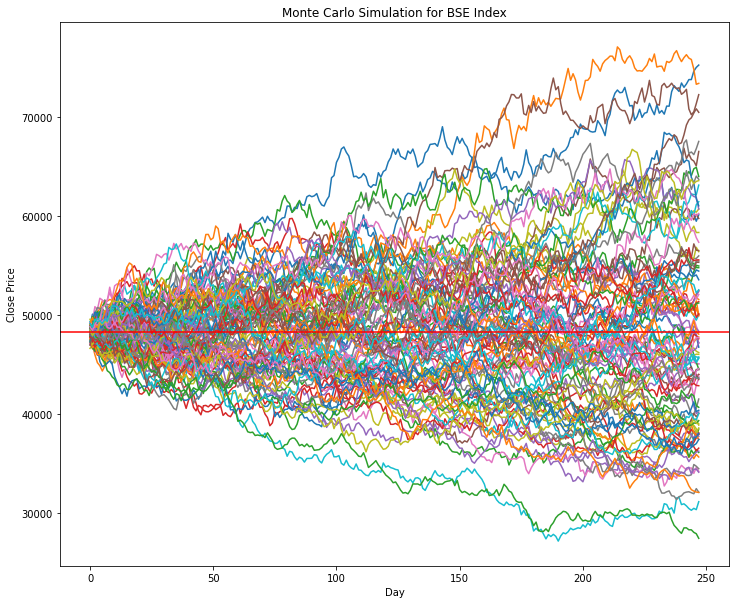

In [12]:
plt.figure(figsize = (12, 10))
plt.title('Monte Carlo Simulation for BSE Index')
plt.plot(close_prediction)
plt.axhline(y = adjclose_series[-1], color = 'r', linestyle = '-')
plt.xlabel('Day')
plt.ylabel('Close Price')
plt.show()